# Inferencia Bayesiana

In [ ]:
#| code-fold: true

import arviz as az
from ipywidgets import interact
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz


ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:

!pip install 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.6/517.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 10.9 MB/s eta 0:00:00


In [ ]:
#| code-fold: true

az.style.use('arviz-doc')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


# </font> **<font color="Teal"> ¡Un poco de contexto histórico!**

El mundo de la Estadística Bayesiana debe su nombre a Thomas Bayes (1702-1761) un ministro presbiteriano, y matemático aficionado, quien derivó por primera vez lo que ahora conocemos como el **Teorema de Bayes**, el cual fue publicado (postumanente) en 1763. Sin embargo una de las primeras personas en realmente desarrollar métodos Bayesianos, fue Pierre-Simon Laplace (1749-1827), por lo que tal vez sería un poco más correcto hablar de _Estadística Laplaciana_ y no Bayesiana.


Hay dos ideas centrales que hacen que un método sea Bayesiano:


* Toda cantidad desconocida es modelada utilizando una distribución de probabilidad de algún tipo.
* El teorema de Bayes es usado para **actualizar** dicha distribución a la luz de los datos.


En el universo Bayesiano las cantidades conocidas son consideradas fijas y usualmente les llamamos **datos**. Por el contrario toda cantidad desconocida es considerada como una variable aleatoria y es considerada un **parámetros** dentro de un modelo Bayesiano.

Los métodos Bayesianos se utilizan generalmente como herramientas de análisis de datos derivados de los principios de la inferencia bayesiana.

Además de interpretarlos formalmente como medio de inducción, los métodos bayesianos nos proporcionan, en nuestros análisis:
* estimaciones de parámetros con buenas propiedades estadísticas  indicar
* descripciones precisas de los datos observados
* predicciones de datos faltantes y pronósticos/predicciones
* un marco computacional para la estimación, selección y validación de modelos!

### Introducimos el Teorema de Bayes

El Teorema de Bayes es una consecuencia directa de la regla del producto. Recordemos, que podemos escribir una probabilidad conjunta mediante Regla de multiplicación, de cualquiera de las siguientes maneras:

\begin{align}
p(\theta, Y) = p(\theta \mid Y)\; p(Y) \\
p(\theta, Y) = p(Y \mid \theta)\; p(\theta)
\end{align}
Dado que los dos términos a la derecha de las igualdades determinan la misma probabilidad, podemos igualarlos entre sí:

$$
p(\theta \mid Y) \; p(Y) = p(Y \mid \theta)\; p(\theta)
$$

Reordenando, llegamos a la siguiente igualdad:

$$
p(\theta \mid Y) = \frac{p(Y \mid \theta) p(\theta)}{p(Y)}
$$

El cual también suele ser escrito de la siguiente forma:

<font color="#00b894">$$
\overbrace{p(\theta \mid Y)}^{\text{posterior}} = \frac{\overbrace{p(Y \mid \theta)}^{\text{likelihood}} \overbrace{p(\theta)}^{\text{prior}}}{\underbrace{\int_{\Theta} p(Y \mid \theta) p(\theta) \text{d}\theta}_{\text{likelihood marginal}}}
$$</font>



Definamos los tres conceptos principales que tendremos en cuenta a la hora de trabajar con métodos bayesianos:

**_Distribución a priori_ p(θ)**: es la forma de introducir conocimiento previo sobre los valores que pueden tomar los parámetros.

En situaciones con escasa información previa, se suelen usar _a prioris_ que asignan igual probabilidad a todos los valores de los parámetros, otras veces se puede elegir _a prioris_ que restrinjan los valores de los parámetros a rangos razonables, algo que se conoce como regularización, por ejemplo solo valores positivos.

Muchas veces contamos con información mucho más precisa como medidas experimentales previas o límites impuesto por alguna teoría.En casos con información previa sólida, se emplean estos a prioris que reflejan explícitamente ese conocimiento.

**_likelihood_ p(Y∣θ)** es la forma de incluir nuestros datos en el análisis. Es una expresión matemática que especifica la plausibilidad de los datos. El _likelihood_ es central tanto en estadística Bayesiana como en estadística no-Bayesiana. A medida que la cantidad de datos aumenta el _likelihood_ tiene cada vez más peso en los resultados, esto explica el porqué a veces los resultados de la estadística Bayesiana y frecuentista coinciden cuando la muestra es _grande_.

**_Distribución a posteriori_ p(θ∣Y)** : describe la probabilidad de los parámetros θ después de haber incorporado la información de los datos mediante _likelihood_ y un _a priori_. Se lo suele pensar como la versión actualizada del _a priori_ tras observar los datos. ¡De hecho un _a posteriori_ puede ser un _a priori_ de un análisis a futuro!


  

**_likelihood marginal_ p(Y)** (también llamado _evidencia_) es el likelihood promediado sobre todas los posibles hipótesis (o conjunto de parámetros) $\theta$, esto es equivalente a $p(Y)$. En general, la _evidencia_ puede ser vista como una simple constante de normalización que en la mayoría de los problemas prácticos puede (y suele) omitirse. Por lo que el teorema de Bayes suele expresarse como:</font>

$$
p(\theta \mid Y) \propto p(Y \mid \theta) p(\theta)
$$





*Resumiendo...*

El teorema de Bayes establece la relación entre estos elementos:

$$
p(\theta \mid Y) \propto p(Y \mid \theta) p(\theta)
$$


Es decir, la distribución a posteriori de θ dado los datos
Y es proporcional al producto entre la verosimilitud y la distribución a priori.

               ┌────────────┐
               │  Prior     │
               │ P(θ)       │   ← Creencia inicial sobre el parámetro θ
               └────┬───────┘
                    │
                    ▼
         ┌──────────────────┐
         │ Likelihood       │
         │ P(Y | θ)     │   ← Qué tan probables son los datos Y para cada valor de θ
         └────┬─────────────┘
              │
              ▼
    ┌────────────────────────┐
    │ Producto:              │
    │ P(θ) * P(Y | θ)    │   ← Numerador del teorema de Bayes
    └────────┬───────────────┘
             │
             ▼
    ┌─────────────────────────────┐
    │ Marginal likelihood      │
    │ P(Y) = ∫ P(Y|θ) P(θ)dθ  │   ← Normaliza la distribución posterior
    └─────────────┬──────────────┘
                  │
                  ▼
         ┌──────────────────────┐
         │ Posterior            │
         │ P(θ | Y)         │  ← Nueva creencia sobre θ después de ver los datos
         └──────────────────────┘



### El _a posteriori_ como único estimador

El _a posteriori_ representa todo lo que sabemos de un problema, dado un modelo y un conjunto de datos. Y por lo tanto cualquier cantidad que nos interese sobre el problema puede deducirse a partir de él. Típicamente esto toma la forma de integrales como la siguiente.

$$
J = \int \varphi(\theta) \ \ p(\theta \mid Y) d\theta
$$

Por ejemplo, para calcular la media de $\theta$ deberíamos reemplazar $\varphi(\theta)$, por $\theta$:

$$
\bar \theta = \int \theta \ \ p(\theta \mid Y) d\theta
$$

Esto no es más que la definición de un promedio pesado, donde cada valor de $\theta$ es _pesado_ según la probabilidad asignada por el _a posteriori_.

En la práctica, y al usar métodos computacionales como los usados en este curso, estas integrales pueden aproximarse usando sumas.

### Estadística Bayesiana en tres pasos

El teorema de Bayes es la única y central herramienta utilizada para construir un estimador en estadística Bayesiana, por lo que conceptualmente la estadística Bayesiana resulta muy simple. Según George Box y [Andrew Gelman et al. (2013)](https://www.crcpress.com/Bayesian-Data-Analysis-Third-Edition/Gelman-Carlin-Stern-Dunson-Vehtari-Rubin/p/book/9781439840955) la estadística Bayesiana se reduce a tres pasos:

1. **Crear un modelo probabilístico**. Los modelos probabilísticos son _historias_ que dan cuenta de como se generan los datos observados (o por observar). Los modelos se expresan usando distribuciones de probabilidad.

2. **Condicionar el modelo a los datos observados a fin de obtener el _a posteriori_**. Usando el teorema de Bayes se actualizan las probabilidades asignadas _a priori_ de acuerdo a los datos observados obteniéndose las probabilidades _a posteriori_.

3. **Criticar el ajuste del modelo generado a los datos y evaluar las consecuencias del modelo**. Se puede demostrar que dada la información previa y los datos observados no existe otro mecanismo capaz de generar una _mejor_ inferencia que la estadística Bayesiana. Esto parece maravilloso, pero hay un problema, sólo es cierto si se asumen que los datos y el modelo son correctos. En la práctica, los datos pueden contener errores y los modelos son _a duras penas_ aproximaciones de fenómenos _reales_. Por lo tanto es necesario realizar varias evaluaciones, incluyendo si las predicciones generadas por el modelo se ajustan a los datos observados, si las conclusiones obtenidas tienen sentido dado el marco conceptual en el que uno trabaja, la sensibilidad de los resultados a los _detalles_ del modelo (sobre todo a detalles para los cuales no tenemos demasiada información),  etc. Además, es posible que realizar inferencia Bayesiana sea demasiado costosa en la práctica por lo que sea conveniente realizar aproximaciones.

-----------------------------------------------------------------------------------------------

## <font color="#00b894">Inferencia Bayesiana para un solo parámetro:</font>
En la práctica la mayoría de los modelos tendrán más de un parámetro, pero empecemos con un modelo con un solo parámetro.

###  El problema de la moneda

Las monedas son objetos cotidianos que permiten introducir ideas complejas de forma accesible. Además, su comportamiento puede modelarse de manera sencilla, lo que las convierte en una herramienta útil para ilustrar problemas más generales.

De hecho, muchos fenómenos reales pueden interpretarse bajo un esquema equivalente al de lanzar una moneda, siempre que el resultado sea binario: éxito/fracaso, sí/no, enfermo/sano, spam/no-spam, entre otros.

En esencia, el modelo que presentaremos —ejemplificado aquí con monedas— es aplicable a cualquier situación en la que los datos observados adopten solo dos valores mutuamente excluyentes. Dado que estos valores son nominales y existen únicamente dos posibilidades, se lo conoce como modelo binomial.

En el siguiente ejemplo trataremos de determinar el grado en que una moneda está sesgada. En general cuando se habla de **sesgo** se hace referencia a la desviación de algún valor (por ejemplo, igual proporción de caras y cecas), pero aquí usaremos el termino **sesgo** de forma más general:
 * <font color="orange">Diremos que el **sesgo** es un valor en el intervalo [0, 1], siendo 0 para una moneda que siempre cae ceca y 1 para una moneda que siempre cae cara y lo representaremos con la variable $\theta$. A fin de cuantificar $\theta$ arrojaremos una moneda al aire repetidas veces, por practicidad arrojaremos la moneda de forma computacional (¡pero nada nos impide hacerlo manualmente!). Llevaremos registro del resultado en la variable $y$. Siendo $y$ la cantidad de caras obtenidas en un experimento.

Habiendo definido nuestro problema debemos expresarlo en términos del Teorema de Bayes,

$$
p(\theta \mid Y) \propto  p(Y \mid  \theta) p(\theta)
$$

Donde, como dijimos $\theta = 1$ quiere decir 100% cara y $\theta = 0$ 100% ceca.



**Ahora sólo restar reemplazar los dos términos a la derecha de la igualdad, el _a priori_ y el _likelihood_,  por distribuciones de probabilidad _adecuadas_ y luego multiplicarlas para obtener el término a la izquierda, el _a posteriori_. Como es la primera vez que haremos ésto, lo haremos paso a paso y analíticamente. En el próximo capítulo veremos cómo hacerlo computacionalmente:**

### Primer paso: definir el _a priori_

El _a priori_ lo modelaremos usando una distribución Beta con parámetros $\alpha$ y $\beta$, que es una distribución muy usada en estadística Bayesiana. La función de densidad de esta distribución es:

$$
p(\theta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

El primer término es una constante de normalización. Por suerte para nuestro problema nos basta con establecer una proporcionalidad, por lo que podemos simplificar esta expresión y escribir la distribución Beta de la siguiente forma.

$$
p(\theta) \propto  \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Hay varias razones para usar una distribución Beta para este y otros problemas:

<font color="orange">* La distribución Beta varía entre 0 y 1, de igual forma que lo hace $\theta$ en nuestro modelo.</font>

<font color="orange">* Esta distribución combinada con la que elegiremos como _likelihood_ (ver más adelante), nos permitirá resolver el problema de forma analítica.</font>

<font color="orange">* Es una distribución versátil para expresar distintas situaciones.</font>

Respecto al último punto, veamos un ejemplo:

 Supongamos que el experimento de la moneda es realizado por tres personas.

 1. La primera dice que no sabe nada de la moneda por lo tanto _a priori_ todos los valores de $\theta$ son igualmente probables.
 2. La segunda persona desconfía de la moneda, ya que sospecha que es una moneda trucada, por lo tanto considera que está sesgada, pero no sabe para cual de las dos opciones.
 3. Por último, la tercer persona asegura que lo más probable es que $\theta$ tome un valor alrededor de 0.5 ya que así lo indican experimentos previos y análisis teóricos sobre tiradas de monedas. Todas estas situaciones pueden ser modeladas por la distribución Beta, como se ve a continuación.

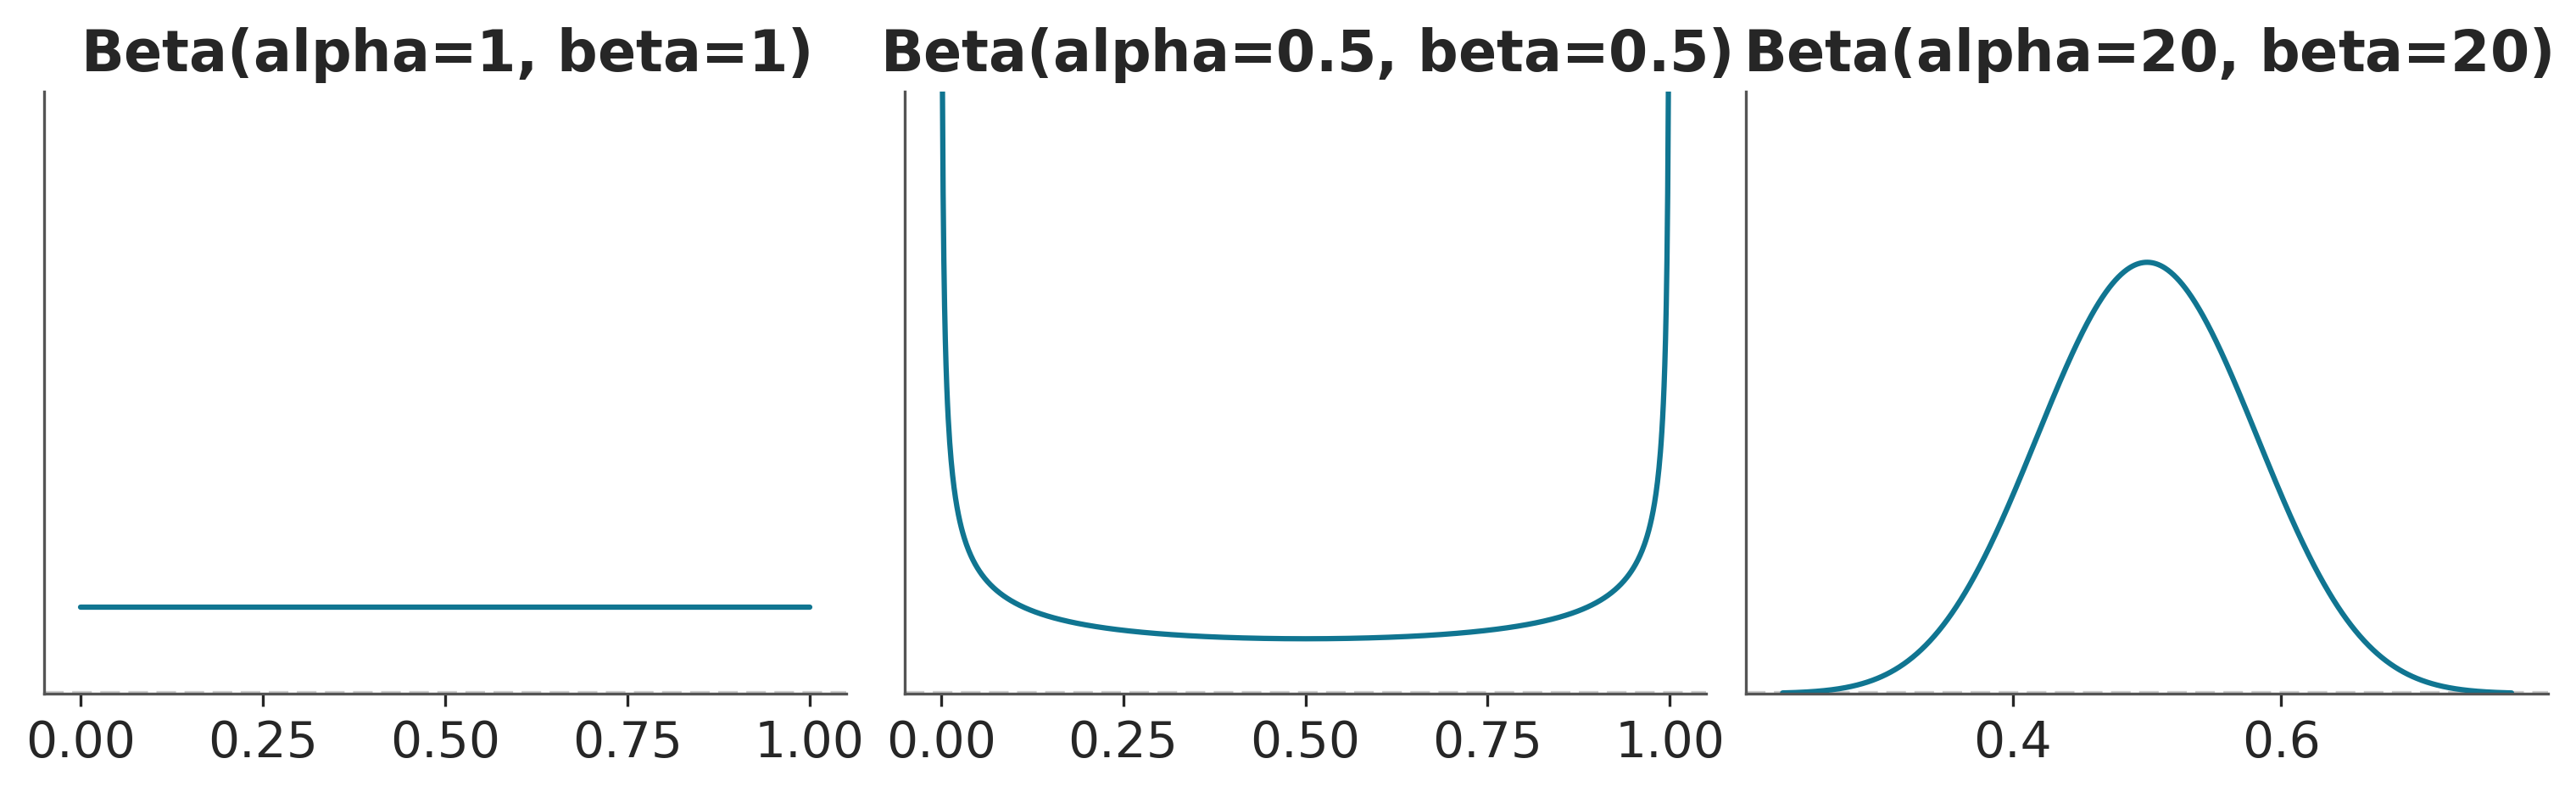

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

params = [(1, 1), (0.5, 0.5), (20, 20)] # definmos los tres priors

for (a, b), ax  in zip(params, axes):
    ax = pz.Beta(a, b).plot_pdf(ax=ax, legend="title")
    ax.set_ylim(0, 7)

Qué observamos?:

Primera imagen: distribución uniforme → ignorancia total sobre el caso

Segunda imagen: La curva en U → sospecha de sesgo.

Tercera imagen: La campana ajustada en 0.5 → confianza en una moneda justa.

In [ ]:
#pz.Beta().plot_interactive(xy_lim=(None, None, None, 10))
pz.Beta().plot_interactive(xy_lim=(None, None, None, 10), figsize=(3,1))

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

**¿Qué sucede a medida que vamos cambiando los parámetros $\alpha$ y $\beta$?**


--------------------------------------------------------------------------------------

###  Segundo paso: definir el _likelihood_

Habiendo definido el _a priori_ veamos ahora el likelihood. Asumiendo que el resultado obtenido al arrojar una moneda no influye en el resultado de posteriores experimentos (es decir los experimentos son independientes entre sí) es razonable utilizar como likelihood la distribución binomial:

* El modelo binomial describe la cantidad de éxitos en $N$ ensayos independientes.

* En nuestro caso:
 Éxito = "el resultado de arrojar la moneda es cara"

con Probabilidad de éxito = $θ$

* Tomamos el número de ensayos = $N$

Entonces la variable aleatoria para nuestro experimento es $Y∼Bin(N,θ)$


Es decir, $θ$ es la probabilidad de que salga cara en un lanzamiento, y la binomial justamente usa esa probabilidad como parámetro.

Dicho de otra forma:

Condicional en θ, las tiradas de moneda son independientes.

Entonces la probabilidad de observar exactamente $y$ caras en $N$ lanzamientos es

$$
p(y \mid \theta) = \frac{N!}{y!(N-y)!} \theta^y (1 - \theta)^{N−y}
$$

Donde $N$ es la cantidad total de experimentos (monedas arrojadas al aire) e $y$ es la cantidad de caras obtenidas.

 A los fines prácticos podríamos simplificar la igualdad anterior y convertirla en una proporcionalidad, eliminando el término $\frac{N!}{y!(N-y)!}$ ya que ese término no depende de $\theta$ que es lo que nos interesa averiguar. Por lo que podríamos establecer que:

$$
p(y \mid \theta) \propto \theta^y (1 - \theta)^{N−y}
$$

La elección de esta distribución para modelar nuestro problema es razonable ya que $\theta$ es la chance de obtener una cara al arrojar una moneda y ese hecho ha ocurrido $y$ veces, de la misma forma $1-\theta$ es la chance de obtener ceca lo cual ha sido observado $N-y$ veces.

In [ ]:
pz.Binomial(1, 0.5).plot_interactive(pointinterval=False, xy_lim=(None, None, None, 1), figsize=(3,1))

interactive(children=(IntSlider(value=1, description='n (0, inf)', max=11, style=SliderStyle(description_width…

Observemos que si consideramos una Bin(1, 0.5) → es decir el caso equilibrado.



### Tercer paso: obtener el _a posteriori_


Se puede demostrar que siempre que usemos como _prior_ una función Beta y como _likelihood_ una distribución binomial obtendremos como resultado una distribución _a posteriori_, la cual será una Beta con los siguientes parámetros:

$$
p(\theta \mid y) = \operatorname{Beta}(\alpha_{a priori} + y, \beta_{a priori} + N - y)
$$

Veamos de donde surge este resultado, según el teorema de Bayes la distribución _a posteriori_ es el producto del _likelihood_ y la distribución _a priori_.

$$
p(\theta \mid y) \propto p(y \mid \theta) p(\theta)
$$

Por lo tanto, en nuestro caso tendremos que:

$$
p(\theta \mid y) \propto \underbrace{{\color{gray}{\frac{N!}{y!(N-y)!}}} \theta^y (1 - \theta)^{N−y}}_{\text{likelihood}} \underbrace{{\color{gray}{\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}}}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}}_{\text{prior}}
$$

Si omitimos las constantes de normalizando del likelihood y prior, obtenemos que el _a posteriori_ es:

$$
p(\theta \mid y) \propto \theta^{\alpha-1+y}(1-\theta)^{\beta-1+N−y}
$$

Podemos ver que la expresión a la derecha de la proporcionalidad tiene la misma forma funcional (sin considerar la constante de proporcionalidad) que una distribución Beta. Como la distribución a posterior debe intergrar a 1 entonces podemos escribir.

$$
p(\theta \mid y) = \frac{\Gamma(\alpha + y +\beta + N -y)}{\Gamma(\alpha + y)\Gamma(\beta + N - y)}\, \theta^{\alpha-1+y}(1-\theta)^{\beta-1+n-y}
$$

Lo que es equivalente a una distribución Beta con parámetros $\alpha_{\text{a posteriori}} = \alpha_{\text{a priori}} + y \quad \beta_{\text{a posteriori}} = \beta_{\text{a priori}} + N - y$.

Se dice que un a priori es conjugado con respecto a un determinado likelihood cuando la forma funcional de la distribución a priori y la de la distribución a posteriori coinciden.

Históricamente, gran parte de los problemas en estadística bayesiana se abordaron utilizando a prioris conjugados, ya que estos garantizan la tratabilidad matemática del modelo. En otras palabras, permiten obtener una expresión analítica exacta para la distribución a posteriori.


<font color="orange">En el capítulo presentaremos técnicas computacionales modernas que hacen posible calcular la distribución a posteriori incluso sin recurrir a a prioris conjugados. Estos avances han sido clave en el resurgimiento y la expansión de la estadística bayesiana en las últimas décadas.</font>

----------------------------------------------------------------------------------------------

##  **¿Cómo representamos los modelos Bayesianos?**

Para representar resumidamente todo lo que desarrollamos hasta ahora en nuestro modelo, y en general en cualquier modelo de estadística Bayesiana (y en probabilidad en general) usamos la siguiente notación:
$$
\begin{align}
\theta \sim & \operatorname{Beta}(\alpha, \beta) \\
Y \sim & \operatorname{Bin}(n=1, p=\theta)
\end{align}
$$

En el enfoque bayesiano modelamos la incertidumbre sobre
θ mediante una distribución a priori, en este caso una Beta(α,β).



---------------------------------------------------------------------------------------------------

# <font color="teal">Armemos un ejemplo con observaciones conocidas</font>
¿Cómo podemos conseguir los datos para nuestra aplicación del modelo anterior?:

Trabajaremos con un ejemplo con datos sintéticos, obtienidos mediante un generador de números (pseudo)aleatorios.

**Ustedes pueden obtener datos reales arrojando una moneda y anotando los resultados observados, como les dejé de tarea** 😃

### Calculamos el _a posteriori_

En el próximo capítulo veremos cómo usar métodos computacionales para computar un _a posteriori_ sin necesidad de derivarlo analíticamente. Esto es lo que haremos para resolver el resto de los problemas del curso.

Ahora, y dado que ya nos tomamos el trabajo de derivar analíticamente la expresión para el _a posteriori_, vamos a usar esa expresión.



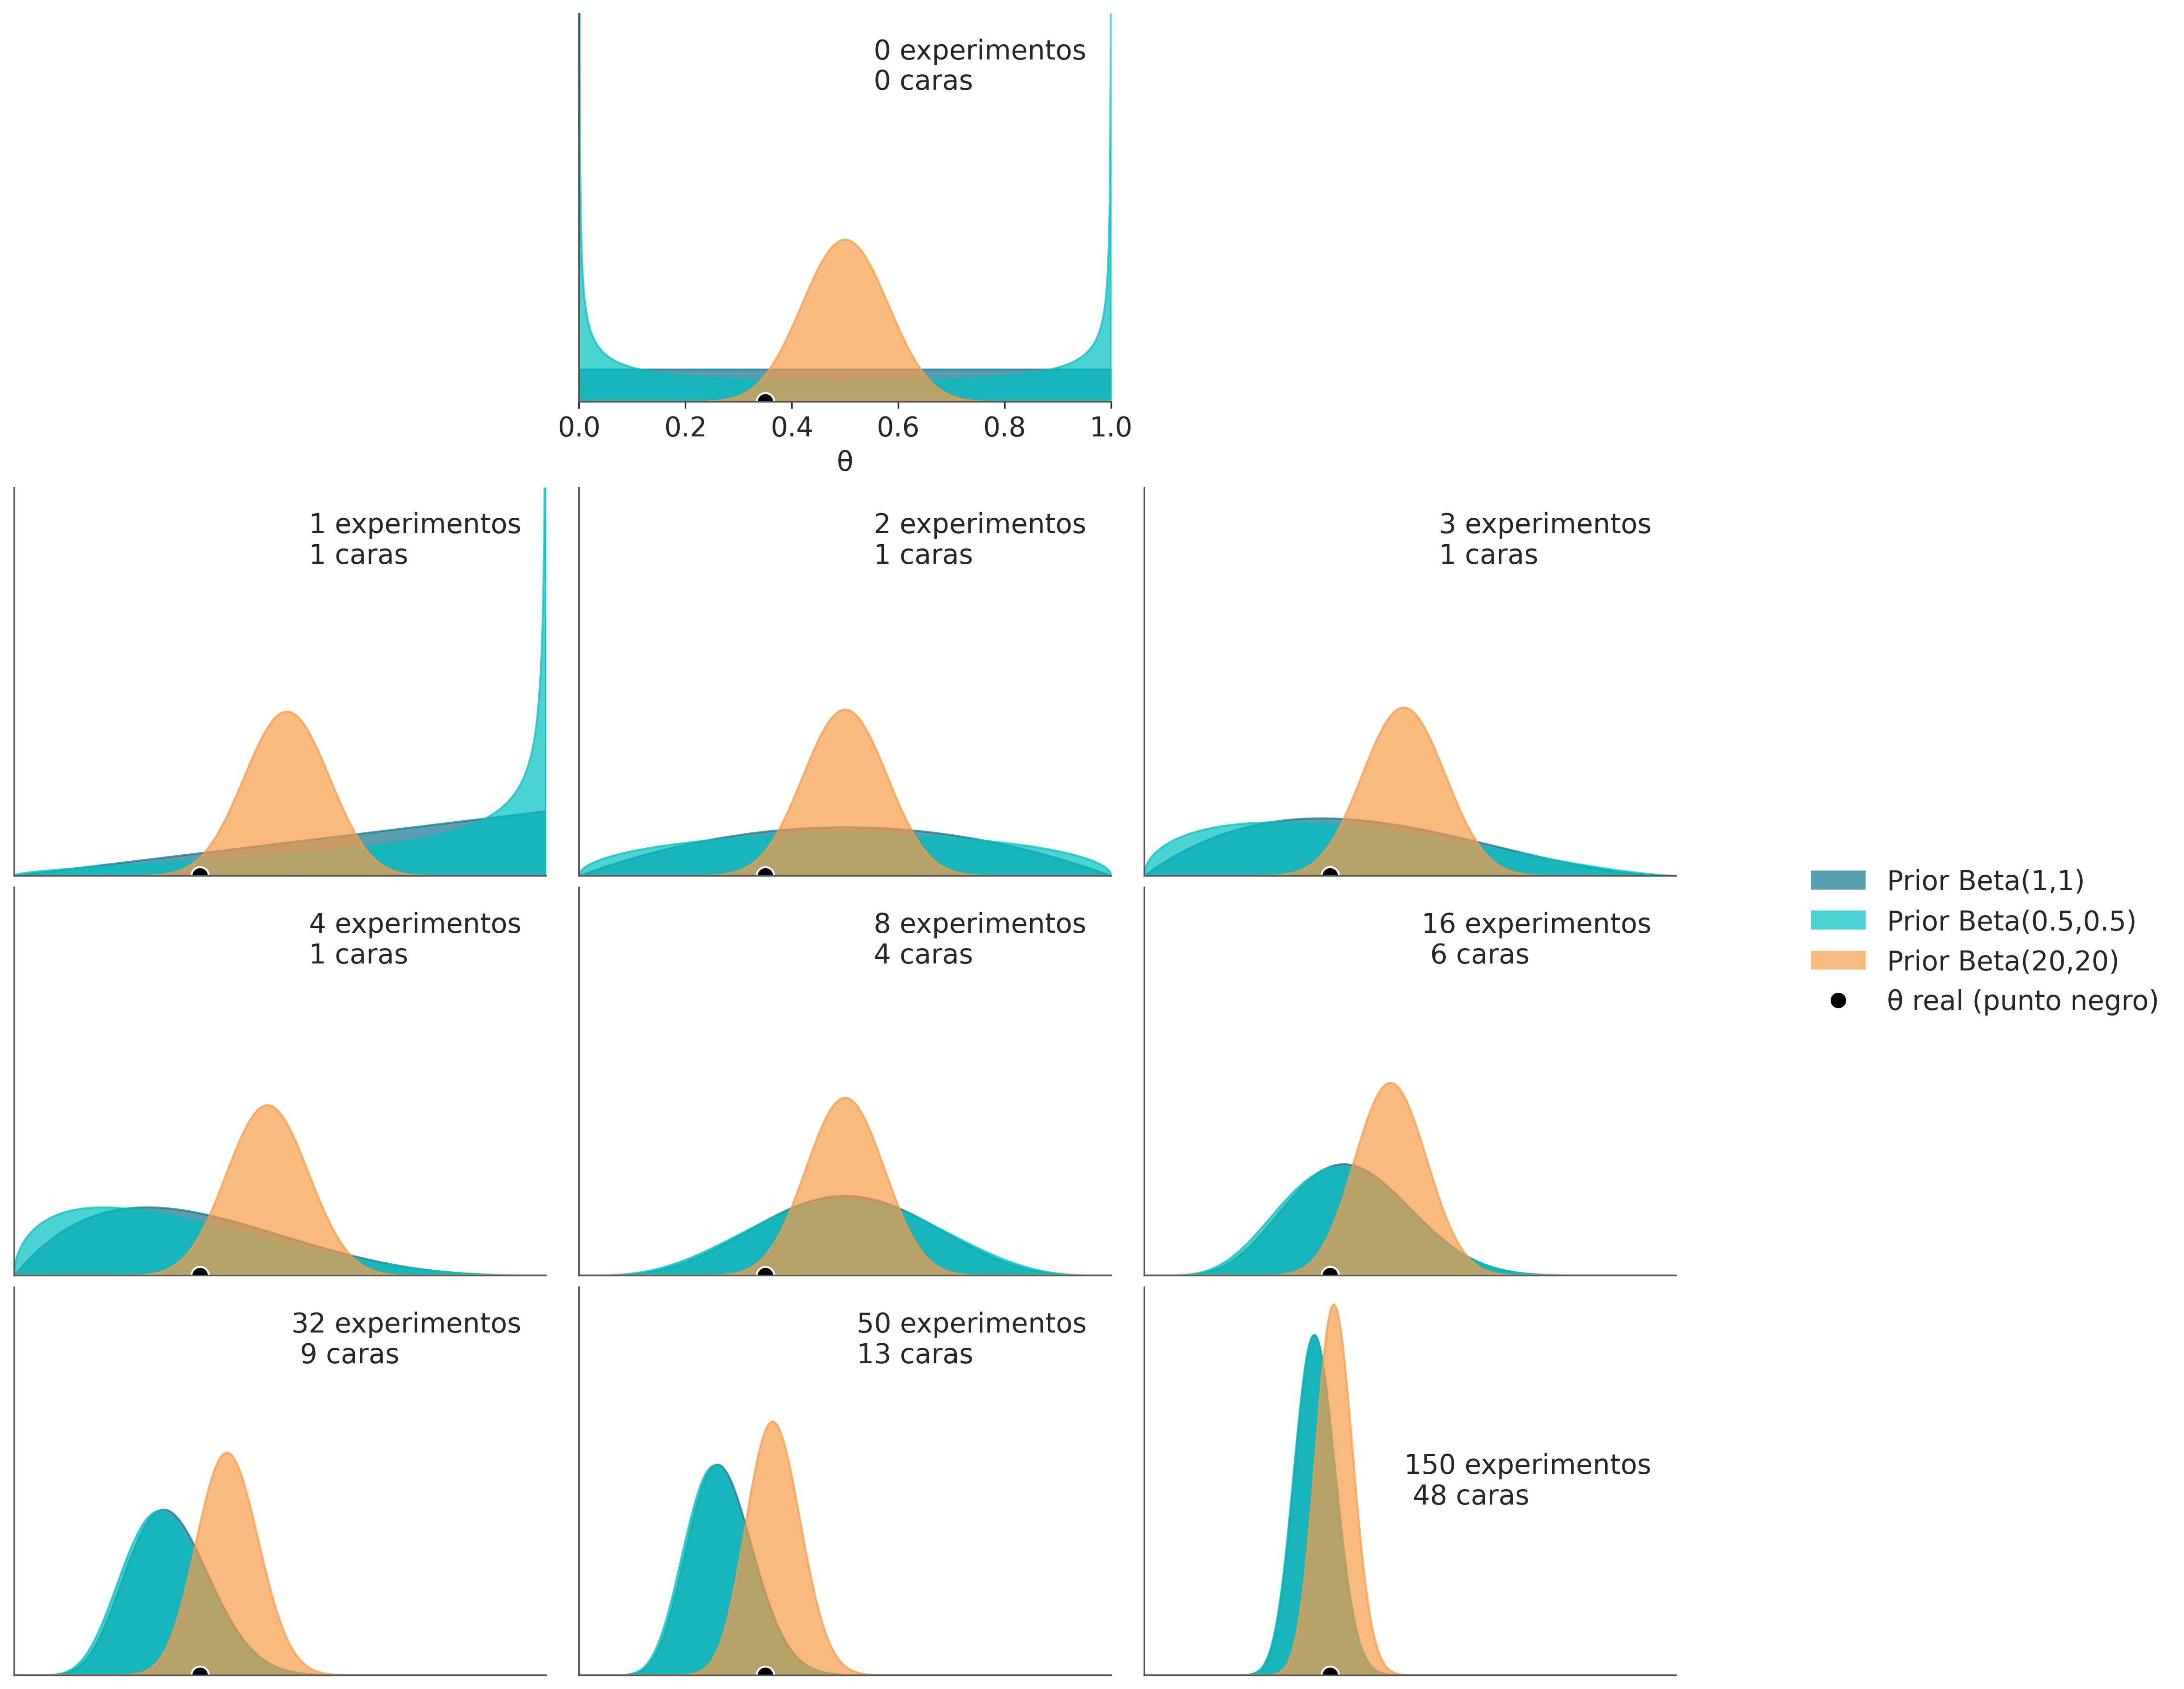

In [ ]:
plt.figure(figsize=(12, 12))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = pz.Beta
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for i, (a_prior, b_prior) in enumerate(beta_params):
        posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
        plt.fill_between(x, 0, posterior, alpha=0.7, color=f'C{i}')

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} experimentos\n{y:4d} caras', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.yticks([])
    plt.legend()  # mantiene las etiquetas invisibles para cada subplot

# Leyenda
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Patch(facecolor='C0', alpha=0.7, label='Prior Beta(1,1)'),
    Patch(facecolor='C1', alpha=0.7, label='Prior Beta(0.5,0.5)'),
    Patch(facecolor='C2', alpha=0.7, label='Prior Beta(20,20)'),
    Line2D([0], [0], marker='o', color='w', label='θ real (punto negro)', markerfacecolor='k', markersize=9)
]

plt.gcf().legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 0.5))

plt.show()


*Observación para poner en práctica a la hora de hacer pruebas:*

se puede ver que la mayoría de las lineas se encargan de dibujar los resultados y no de calcularlos. El cálculo del _a posteriori_ ocurre en la línea 20. Cada una de estas lineas computa el _a posteriori_ para cada uno de los _a prioris_ que vimos antes. El cálculo es simple, tan solo se computa el valor del _a posteriori_ (usando la función _pdf_ de la distribución Beta provista por PreliZ) para 2000 puntos igualmente espaciados entre 0 y 1 (linea 9). El loop que empieza en la linea 11 se debe a que exploraremos cómo cambian las distribuciones _a posteriori_ para distinta cantidad de datos (*n_intentos*). Con un círculo negro de contorno blanco se indica el valor real de $\theta$, valor que por supuesto es desconocido en una situación real, pero conocido para mí, ya que los datos son sintéticos.

## Analizando los resultados ¿ Qué nos muestran estos gráficos?



La primer figura del panel muestra los *a priori*, nuestra estimación de $\theta$ dado que no hemos realizado ningún experimento. Las sucesivas nueve figuras muestran las distribuciones *a posteriori* y se indica la cantidad de experimentos y de caras obtenidas. Además se puede ver un círculo negro de contorno blanco en 0.35, la cual representa el valor verdadero de $\theta$. Por supuesto que en problemas reales este valor es desconocido.

Este ejemplo es realmente ilustrativo en varios aspectos.

* El resultado de un análisis Bayesiano NO es un solo valor, si no una distribución (_a posteriori_) de los valores plausibles de los parámetros (dado los datos y el modelo).
* La dispersión o ancho de las curvas es una medida de la incertidumbre sobre los valores.
* El valor más probable viene dado por la moda de la distribución (el _pico_ de la distribución).
* Aún cuando $\frac{2}{1} = \frac{8}{4}$ son numéricamente iguales tenemos menor incertidumbre en un resultado cuando el número de experimentos es mayor.
* Dada una cantidad _suficiente_ de datos los resultados tienden a converger sin importar el _a priori_ usado.
* La rapidez con la que los resultados convergen varía. En este ejemplo las curvas azul y turquesa parecen converger con tan solo 8 experimentos, pero se necesitan más de 50 experimentos para que las tres curvas se muestren similares. Aún con 150 experimentos se observan ligeras diferencias.
* Partiendo de los _a priori_ uniforme (azul) o _sesgado_ (turquesa) y habiendo realizado un solo experimento y observado una sola cara, lo más razonable es pensar que estamos frente a una moneda con dos caras!
* La situación cambia drásticamente al ver por primera vez una moneda caer ceca. Ahora lo más probable (dado cualquiera de los tres *a prioris*) es inferir que $\theta=0.5$. Los valores de $\theta$ exactamente 0 o 1 se vuelven imposibles.
* El _a priori_ naranja es más informativo que los otros dos (la distribución esta más concentrada), por ello se requiere de un número mas grande de experimentos para "moverlo".
* El _a priori_ uniforme (azul) es lo que se conoce como no informativo. El resultado de un análisis Bayesiano usando un _a priori_ no-informativos en general coinciden con los resultados de análisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$).

**Ejercitación:**

1. Cambiar los valores de N o y para ver cómo cambia la concentración y el pico del posterior.

2. Cambiar los parámetros del prior para ver cómo influye la creencia previa:

deben poder observar que:
Prior débil → curva más flexible y abierta
Prior fuerte → curva más concentrada alrededor de 0.5, incluso si los datos son pocos

3. Comparar distintos N para entender qué sucede a medida que los datos aumentan (spoiler: todos los priors “convergen” hacia el mismo posterior).

---------------------------------------------------------------------------------------

## **Ejercicios del capítulo 1**

1. El estadístico Bruno de Finetti declaró que "Las probabilidades no existen". Cómo se vincula este enunciado con el modelo BetaBinomial que hemos visto?

1. Edwin Jaynes, físico, declaró que la teoría de probabilidad es la lógica de la ciencia. Discutí este enunciado.


1. Usá pz.Beta().plot_interactive() para explorar distintas combinaciones de parámetros de la distribución Beta. Cuál es el efecto de los parámetros $\alpha$ y $\beta$?

1. Interpretá los parámetros de una distribución Beta, $\alpha$ y $\beta$ en términos de su PDF (probability density function). Analizá solo el caso de $\alpha >= 1$ y $\beta >= 1$

1. La media de la distribución Beta es $\frac{\alpha}{\alpha+\beta}$. Cuál es la media de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

1. La varianza de la distribución Beta es $\frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$. Cuál es la varianza de la distribución a posteriori para un modelo Beta-Binomial, con prior Beta(2, 5) y 10 experimentos con 6 caras?

1. Contrastá los resultados de los puntos anteriores usando la función `mean` y `var` de la distribución Beta de PreliZ.

1. PreliZ tiene una función llamada [maxent](https://preliz.readthedocs.io/en/latest/api_reference.html#preliz.unidimensional.maxent). Explicá que hace.

1. Conocimiento experto indica que un parámetro debe ser positivo y que el 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

1. Conocimiento experto indica que un parámetro debe ser positivo con media 6 y 90% puede estar entre 2 y 20. Usá maxent para definir ese prior.

1. Usá la siguiente función para explorar diversas combinaciones de _priors_ y _likelihoods_. Enunciá las conclusiones que consideres más relevantes.

Guía:

In [1]:
def a_posteriori_grilla(grilla=10, a=1, b=1, caras=6, tiradas=9):
    grid = np.linspace(0, 1, grilla)
    prior = pz.Beta(a, b).pdf(grid)
    likelihood = pz.Binomial(n=tiradas, p=grid).pdf(caras)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    _, ax = plt.subplots(1, 3, sharex=True, figsize=(16, 4))
    ax[0].set_title('caras = {}\ntiradas = {}'.format(caras, tiradas))
    for i, (e, e_n) in enumerate(zip([prior, likelihood, posterior], ['a priori', 'likelihood', 'a posteriori'])):
        ax[i].set_yticks([])
        ax[i].plot(grid, e, 'o-', label=e_n)
        ax[i].legend(fontsize=14)


interact(a_posteriori_grilla, grilla=ipyw.IntSlider(min=2, max=100, step=1, value=15), a=ipyw.FloatSlider(min=1, max=7, step=1, value=1), b=ipyw.FloatSlider(
    min=1, max=7, step=1, value=1), caras=ipyw.IntSlider(min=0, max=20, step=1, value=6), tiradas=ipyw.IntSlider(min=0, max=20, step=1, value=9));

NameError: name 'interact' is not defined